# Calculating AQI (Air Quality Index) in India




Preparing data

The dataset used is hourly air quality data (2015 - 2020) from various measuring stations across India:

We'll use one city (Bangolre in karnataka) that has two stations and compare it with the actual AQI values present in the data at station, city, hour and day level to confirm the calculations are correct.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## defining constants
PATH_STATION_HOUR = "C:\\Users\\syeds\\Desktop\\setdata\\station_hour.csv"
PATH_STATION_DAY = "C:\\Users\\syeds\\Desktop\\setdata\\station_day.csv"
PATH_CITY_HOUR = "C:\\Users\\syeds\\Desktop\\setdata\\city_hour.csv"
PATH_CITY_DAY = "C:\\Users\\syeds\\Desktop\\setdata\\city_day.csv"
PATH_STATIONS = "C:\\Users\\syeds\\Desktop\\setdata\\stations.csv"

STATIONS = ["KA007", "KA008"]


In [3]:
## importing data and subsetting the station
df = pd.read_csv(PATH_STATION_HOUR, parse_dates = ["Datetime"])
stations = pd.read_csv(PATH_STATIONS)

df = df.merge(stations, on = "StationId")

df = df[df.StationId.isin(STATIONS)]
df.sort_values(["StationId", "Datetime"], inplace = True)
df["Date"] = df.Datetime.dt.date.astype(str)
df.Datetime = df.Datetime.astype(str)

C:\Users\syeds\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Formula


The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

For CO and O3 the maximum value in last 8-hrs is used.

Each measure is converted into a Sub-Index based on pre-defined groups.

Sometimes measures are not available due to lack of measuring or lack of required data points.

Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.


In [4]:
df["PM10_24hr_avg"] = df.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NOx_24hr_avg"] = df.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df["NH3_24hr_avg"] = df.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values

In [5]:
df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,State,Status,Date,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max
1518437,KA007,2018-07-03 18:00:00,17.00,NaN,14.95,42.75,34.85,26.65,0.52,NaN,...,Karnataka,Active,2018-07-03,NaN,NaN,NaN,NaN,NaN,0.52,NaN
1518438,KA007,2018-07-03 19:00:00,17.25,NaN,10.20,64.15,42.43,26.07,0.46,8.90,...,Karnataka,Active,2018-07-03,NaN,NaN,NaN,NaN,NaN,0.52,NaN
1518439,KA007,2018-07-03 20:00:00,17.75,NaN,19.67,87.00,74.22,25.90,0.66,5.10,...,Karnataka,Active,2018-07-03,NaN,NaN,NaN,NaN,NaN,0.66,7.64
1518440,KA007,2018-07-03 21:00:00,18.00,NaN,22.70,NaN,88.10,31.85,0.69,5.50,...,Karnataka,Active,2018-07-03,NaN,NaN,NaN,NaN,NaN,0.69,8.33
1518441,KA007,2018-07-03 22:00:00,21.50,NaN,10.72,99.10,68.00,39.32,0.46,NaN,...,Karnataka,Active,2018-07-03,NaN,NaN,NaN,NaN,NaN,0.69,9.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553599,KA008,2020-06-30 20:00:00,24.25,37.00,2.30,26.62,16.00,6.15,0.74,4.47,...,Karnataka,Active,2020-06-30,25.729167,14.427083,3.119583,7.228750,6.261667,0.74,31.51
1553600,KA008,2020-06-30 21:00:00,29.50,41.25,1.25,18.75,11.00,4.75,0.70,2.40,...,Karnataka,Active,2020-06-30,25.093750,14.385417,3.137083,7.132917,6.203333,0.74,31.51
1553601,KA008,2020-06-30 22:00:00,24.00,36.75,0.45,15.05,8.25,4.35,0.60,0.85,...,Karnataka,Active,2020-06-30,25.062500,14.593750,3.153750,7.272500,6.213750,0.74,31.51
1553602,KA008,2020-06-30 23:00:00,21.25,39.00,0.30,13.07,6.97,4.35,0.52,0.30,...,Karnataka,Active,2020-06-30,25.854167,14.864583,3.019583,7.435833,6.227083,0.74,31.51


<AxesSubplot:>

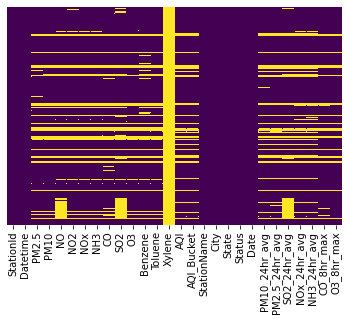

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
print(df.isnull().sum())

StationId             0
Datetime              0
PM2.5              5025
PM10               4996
NO                 7659
NO2                5096
NOx                4997
NH3                5024
CO                 5531
SO2                7983
O3                 4864
Benzene            5663
Toluene            4706
Xylene            35167
AQI                5012
AQI_Bucket         5012
StationName           0
City                  0
State                 0
Status                0
Date                  0
PM10_24hr_avg      5204
PM2.5_24hr_avg     5148
SO2_24hr_avg       8064
NOx_24hr_avg       5191
NH3_24hr_avg       5213
CO_8hr_max         4153
O3_8hr_max         3756
dtype: int64


In [8]:
(df.isnull().sum()/df.shape[0]*50).sort_values(ascending=False)

Xylene            50.000000
SO2_24hr_avg      11.465294
SO2               11.350129
NO                10.889470
Benzene            8.051582
CO                 7.863907
NH3_24hr_avg       7.411778
PM10_24hr_avg      7.398982
NOx_24hr_avg       7.380499
PM2.5_24hr_avg     7.319362
NO2                7.245429
PM2.5              7.144482
NH3                7.143060
AQI_Bucket         7.125999
AQI                7.125999
NOx                7.104672
PM10               7.103250
O3                 6.915574
Toluene            6.690932
CO_8hr_max         5.904683
O3_8hr_max         5.340234
Date               0.000000
Status             0.000000
State              0.000000
City               0.000000
StationName        0.000000
Datetime           0.000000
StationId          0.000000
dtype: float64

# Features

-->City

-->Date

-->PM2.5 (Particulate Matter 2.5-micrometer)

-->PM10 (Particulate Matter 10-micrometer)

-->SO2 (Sulphur Dioxide)

-->NOx (Any Nitric x-oxide)

-->NH3 (Ammonia)

-->CO (Carbon Monoxide)

-->O3 (Ozone or Trioxygen)

-->Benzene

-->Toluene

-->Xylene

-->AQI

-->AQI_Bucket

In [9]:
df.describe() # but it gives the information about all the cities alltogether

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max
count,30142.000000,30171.000000,27508.000000,30071.000000,30170.000000,30143.000000,29636.000000,27184.000000,30303.000000,29504.000000,30461.000000,0.0,30155.000000,29963.000000,30019.000000,27103.000000,29976.000000,29954.000000,31014.000000,31411.00000
mean,29.904386,69.889049,6.545854,26.704928,19.583412,13.170464,0.908194,6.267688,43.468552,0.329840,2.627616,NaN,86.874349,70.040845,29.924378,6.315785,19.572263,13.174915,1.382543,60.47043
std,23.286581,46.899739,13.876857,23.497999,22.012754,9.214347,0.669710,4.887081,28.913978,0.319351,2.412594,NaN,41.963156,36.571798,18.878939,4.137198,14.364394,8.386878,0.996949,34.47115
min,1.000000,1.500000,0.100000,0.200000,0.100000,0.100000,0.010000,0.100000,0.200000,0.100000,0.100000,NaN,16.000000,9.322917,2.265625,0.390625,2.962083,0.520833,0.030000,0.20000
25%,14.000000,37.000000,0.850000,11.150000,6.950000,7.620000,0.460000,2.830000,23.030000,0.100000,0.900000,NaN,53.000000,40.802083,15.208333,3.010000,9.301875,8.160625,0.720000,34.89000
50%,24.750000,60.000000,2.150000,19.900000,12.680000,10.180000,0.710000,3.800000,36.700000,0.200000,1.850000,NaN,83.000000,62.666667,26.343750,3.702083,14.445000,10.730833,1.150000,51.40000
75%,40.250000,91.500000,6.450000,36.065000,24.620000,16.580000,1.190000,10.400000,56.590000,0.400000,3.580000,NaN,110.000000,94.375000,41.250000,10.552917,27.119500,15.707917,1.660000,78.50000
max,549.000000,764.000000,390.520000,396.530000,438.750000,259.270000,8.600000,88.550000,199.860000,7.380000,35.070000,NaN,384.000000,291.226190,229.218750,23.692857,147.381667,70.757500,8.600000,199.86000


In [10]:
#converting dtype of date column to datetime
df['Date']=df['Date'].apply(pd.to_datetime)
#setting date column as index
df.set_index('Date',inplace=True)

In [11]:
df.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status', 'PM10_24hr_avg',
       'PM2.5_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg', 'NH3_24hr_avg',
       'CO_8hr_max', 'O3_8hr_max'],
      dtype='object')

# filling the Nan values present in the pollutants with mean (city wise)

In [12]:
df.iloc[:, 1:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))

In [13]:
df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,City,State,Status,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,KA007,17.00,69.889049,14.95,42.750000,34.85,26.65,0.52,6.267688,43.468552,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.52,NaN
2018-07-03,KA007,17.25,69.889049,10.20,64.150000,42.43,26.07,0.46,8.900000,43.468552,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.52,NaN
2018-07-03,KA007,17.75,69.889049,19.67,87.000000,74.22,25.90,0.66,5.100000,7.640000,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.66,7.64
2018-07-03,KA007,18.00,69.889049,22.70,26.704928,88.10,31.85,0.69,5.500000,8.330000,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.69,8.33
2018-07-03,KA007,21.50,69.889049,10.72,99.100000,68.00,39.32,0.46,6.267688,9.020000,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.69,9.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,KA008,24.25,37.000000,2.30,26.620000,16.00,6.15,0.74,4.470000,24.350000,...,Bengaluru,Karnataka,Active,25.729167,14.427083,3.119583,7.228750,6.261667,0.74,31.51
2020-06-30,KA008,29.50,41.250000,1.25,18.750000,11.00,4.75,0.70,2.400000,25.230000,...,Bengaluru,Karnataka,Active,25.093750,14.385417,3.137083,7.132917,6.203333,0.74,31.51
2020-06-30,KA008,24.00,36.750000,0.45,15.050000,8.25,4.35,0.60,0.850000,21.270000,...,Bengaluru,Karnataka,Active,25.062500,14.593750,3.153750,7.272500,6.213750,0.74,31.51


<AxesSubplot:ylabel='Date'>

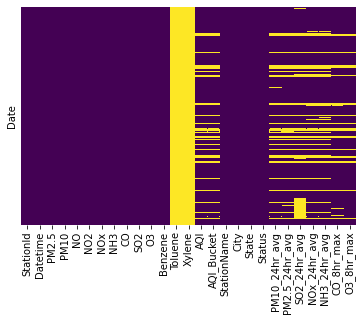

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.iloc[:, 1:13]=df.fillna(df.mean())
df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,City,State,Status,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,KA007,KA007,17.00,69.889049,14.95,42.750000,34.85,26.65,0.52,6.267688,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.52,NaN
2018-07-03,KA007,KA007,17.25,69.889049,10.20,64.150000,42.43,26.07,0.46,8.900000,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.52,NaN
2018-07-03,KA007,KA007,17.75,69.889049,19.67,87.000000,74.22,25.90,0.66,5.100000,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.66,7.64
2018-07-03,KA007,KA007,18.00,69.889049,22.70,26.704928,88.10,31.85,0.69,5.500000,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.69,8.33
2018-07-03,KA007,KA007,21.50,69.889049,10.72,99.100000,68.00,39.32,0.46,6.267688,...,Bengaluru,Karnataka,Active,NaN,NaN,NaN,NaN,NaN,0.69,9.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,KA008,KA008,24.25,37.000000,2.30,26.620000,16.00,6.15,0.74,4.470000,...,Bengaluru,Karnataka,Active,25.729167,14.427083,3.119583,7.228750,6.261667,0.74,31.51
2020-06-30,KA008,KA008,29.50,41.250000,1.25,18.750000,11.00,4.75,0.70,2.400000,...,Bengaluru,Karnataka,Active,25.093750,14.385417,3.137083,7.132917,6.203333,0.74,31.51
2020-06-30,KA008,KA008,24.00,36.750000,0.45,15.050000,8.25,4.35,0.60,0.850000,...,Bengaluru,Karnataka,Active,25.062500,14.593750,3.153750,7.272500,6.213750,0.74,31.51


<AxesSubplot:ylabel='Date'>

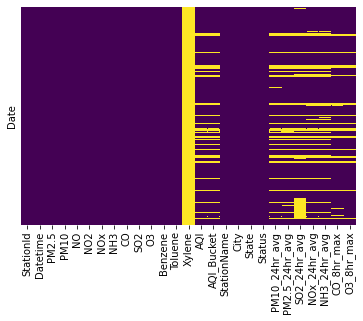

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# calculating sub index

PM2.5 (Particulate Matter 2.5-micrometer)

PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [17]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

PM10 (Particulate Matter 10-micrometer)

PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [18]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x)) 

SO2 (Sulphur Dioxide)

SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [19]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))


NOx (Any Nitric x-oxide)

NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:

In [20]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))




NH3 (Ammonia)

NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below


In [21]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))



CO (Carbon Monoxide)

CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:

In [22]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))


     

O3 (Ozone or Trioxygen)

O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [23]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))




# Filling the Nan values of AQI column by taking maximum values out of sub-Indexes

In [24]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))

In [25]:
df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,KA007,KA007,17.00,69.889049,14.95,42.750000,34.85,26.65,0.52,6.267688,...,NaN,0.52,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,26.0,0.00
2018-07-03,KA007,KA007,17.25,69.889049,10.20,64.150000,42.43,26.07,0.46,8.900000,...,NaN,0.52,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,26.0,0.00
2018-07-03,KA007,KA007,17.75,69.889049,19.67,87.000000,74.22,25.90,0.66,5.100000,...,NaN,0.66,7.64,0.000000,0.000000,0.000000,0.000000,0.000000,33.0,7.64
2018-07-03,KA007,KA007,18.00,69.889049,22.70,26.704928,88.10,31.85,0.69,5.500000,...,NaN,0.69,8.33,0.000000,0.000000,0.000000,0.000000,0.000000,34.5,8.33
2018-07-03,KA007,KA007,21.50,69.889049,10.72,99.100000,68.00,39.32,0.46,6.267688,...,NaN,0.69,9.02,0.000000,0.000000,0.000000,0.000000,0.000000,34.5,9.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,KA008,KA008,24.25,37.000000,2.30,26.620000,16.00,6.15,0.74,4.470000,...,6.261667,0.74,31.51,24.045139,25.729167,3.899479,9.035938,1.565417,37.0,31.51
2020-06-30,KA008,KA008,29.50,41.250000,1.25,18.750000,11.00,4.75,0.70,2.400000,...,6.203333,0.74,31.51,23.975694,25.093750,3.921354,8.916146,1.550833,37.0,31.51
2020-06-30,KA008,KA008,24.00,36.750000,0.45,15.050000,8.25,4.35,0.60,0.850000,...,6.213750,0.74,31.51,24.322917,25.062500,3.942188,9.090625,1.553438,37.0,31.51


<AxesSubplot:ylabel='Date'>

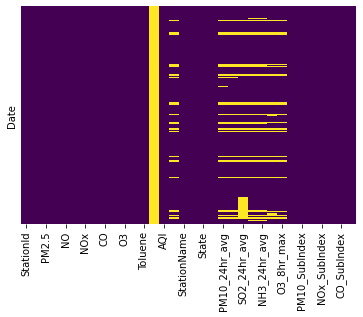

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# calculating AQI bucket and filling the NAN value present

In [27]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [28]:
df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,KA007,KA007,17.00,69.889049,14.95,42.750000,34.85,26.65,0.52,6.267688,...,NaN,0.52,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,26.0,0.00
2018-07-03,KA007,KA007,17.25,69.889049,10.20,64.150000,42.43,26.07,0.46,8.900000,...,NaN,0.52,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,26.0,0.00
2018-07-03,KA007,KA007,17.75,69.889049,19.67,87.000000,74.22,25.90,0.66,5.100000,...,NaN,0.66,7.64,0.000000,0.000000,0.000000,0.000000,0.000000,33.0,7.64
2018-07-03,KA007,KA007,18.00,69.889049,22.70,26.704928,88.10,31.85,0.69,5.500000,...,NaN,0.69,8.33,0.000000,0.000000,0.000000,0.000000,0.000000,34.5,8.33
2018-07-03,KA007,KA007,21.50,69.889049,10.72,99.100000,68.00,39.32,0.46,6.267688,...,NaN,0.69,9.02,0.000000,0.000000,0.000000,0.000000,0.000000,34.5,9.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,KA008,KA008,24.25,37.000000,2.30,26.620000,16.00,6.15,0.74,4.470000,...,6.261667,0.74,31.51,24.045139,25.729167,3.899479,9.035938,1.565417,37.0,31.51
2020-06-30,KA008,KA008,29.50,41.250000,1.25,18.750000,11.00,4.75,0.70,2.400000,...,6.203333,0.74,31.51,23.975694,25.093750,3.921354,8.916146,1.550833,37.0,31.51
2020-06-30,KA008,KA008,24.00,36.750000,0.45,15.050000,8.25,4.35,0.60,0.850000,...,6.213750,0.74,31.51,24.322917,25.062500,3.942188,9.090625,1.553438,37.0,31.51


<AxesSubplot:ylabel='Date'>

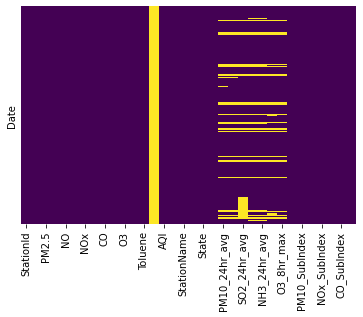

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
df.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status', 'PM10_24hr_avg',
       'PM2.5_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg', 'NH3_24hr_avg',
       'CO_8hr_max', 'O3_8hr_max', 'PM2.5_SubIndex', 'PM10_SubIndex',
       'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex',
       'O3_SubIndex'],
      dtype='object')

In [31]:
df_city_day = df.copy()
df_city_day.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status', 'PM10_24hr_avg',
       'PM2.5_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg', 'NH3_24hr_avg',
       'CO_8hr_max', 'O3_8hr_max', 'PM2.5_SubIndex', 'PM10_SubIndex',
       'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex',
       'O3_SubIndex'],
      dtype='object')

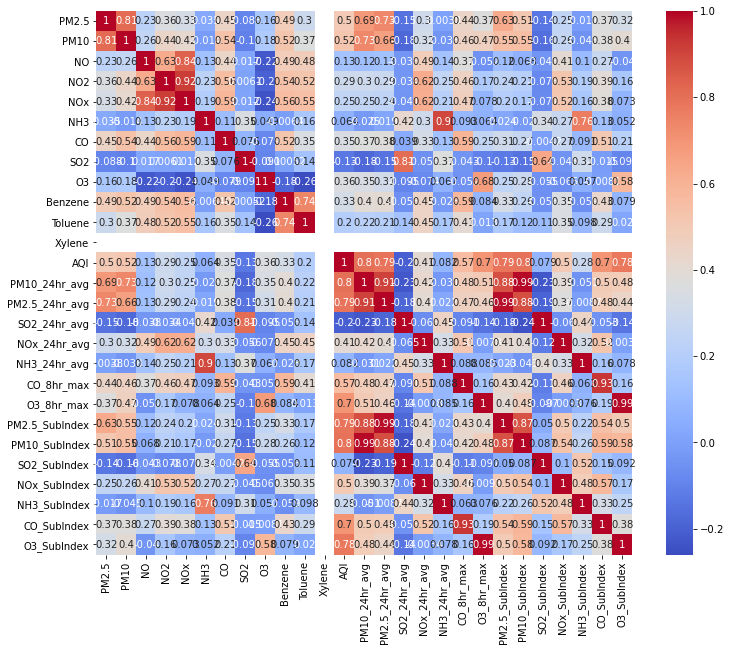

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Distribution of different pollutants in last 5 years


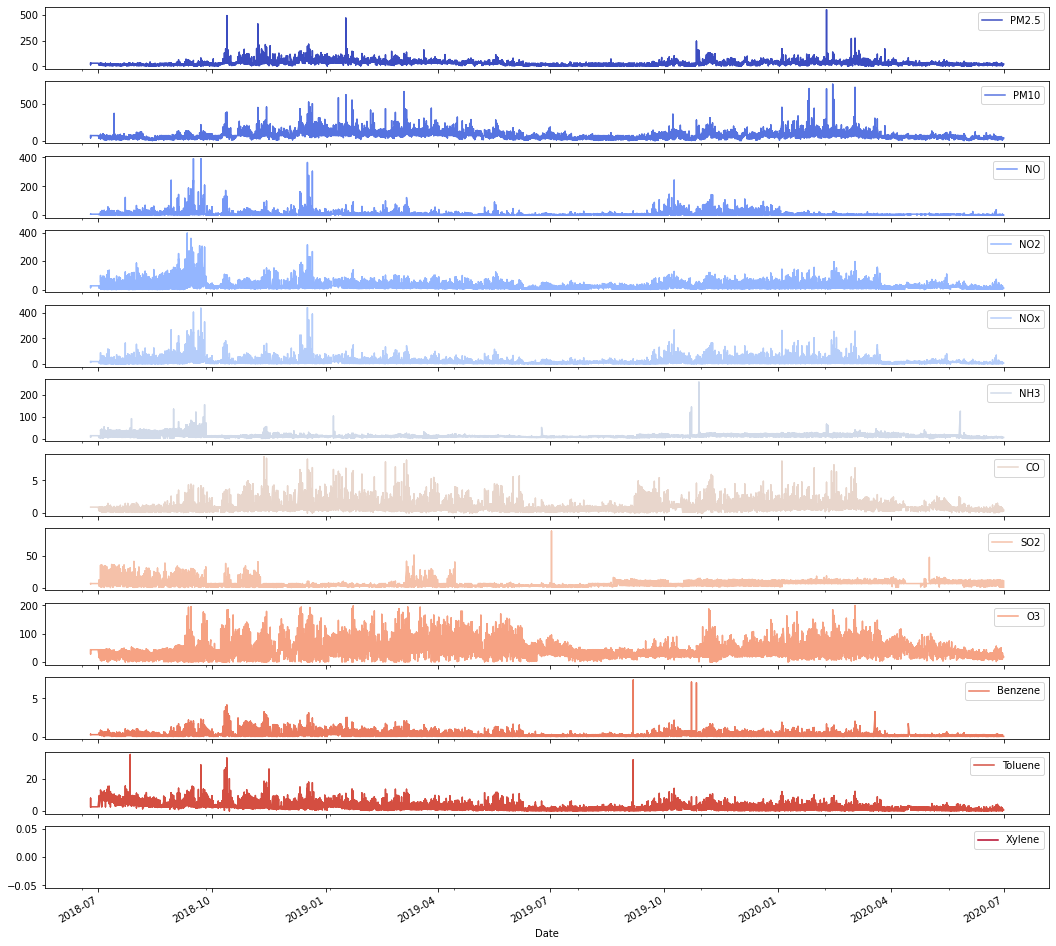

In [33]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

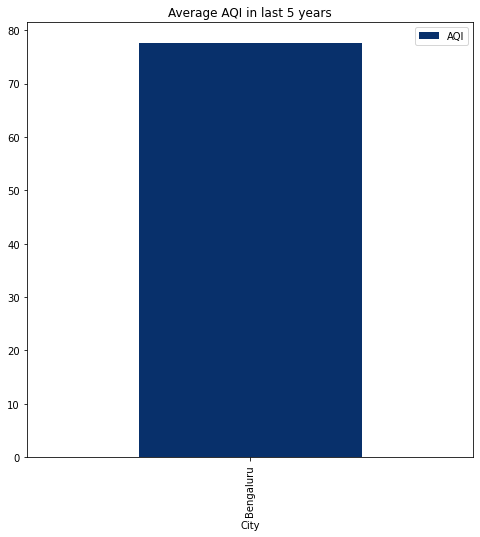

In [34]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

# Creating Model for predicting the Output

In [35]:
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
Date,,
2018-07-03,26.0,Good
2018-07-03,26.0,Good
2018-07-03,33.0,Good
2018-07-03,34.0,Good
2018-07-03,34.0,Good
...,...,...
2020-06-30,37.0,Good
2020-06-30,37.0,Good
2020-06-30,37.0,Good


In [36]:
final_df['AQI_Bucket'].unique()

array(['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor'],
      dtype=object)

In [37]:
#final_df = pd.get_dummies(final_df)
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
Date,,
2018-07-03,26.0,0
2018-07-03,26.0,0
2018-07-03,33.0,0
2018-07-03,34.0,0
2018-07-03,34.0,0


# Predicting the values of AQI_Bucket w.r.t values of AQI using Random Forest Classifier

In [38]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

<ipython-input-39-dd11680feaad>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)


In [40]:
print("Enter the value of AQI:")
AQI = float(input("AQI : "))
output = clf.predict([[AQI]])
output
#0-->Good
#1-->Satisfactory
#2-->moderate
#3-->poor
#4-->Very poor
#5-->Severe

Enter the value of AQI:
AQI : 56


array([1])

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2593
           1       1.00      1.00      1.00      3424
           2       1.00      1.00      1.00      2634
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00        17

    accuracy                           1.00      8792
   macro avg       1.00      1.00      1.00      8792
weighted avg       1.00      1.00      1.00      8792

[[2593    0    0    0    0]
 [   0 3424    0    0    0]
 [   0    0 2634    0    0]
 [   0    0    0  124    0]
 [   0    0    0    0   17]]
